In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle
from sklearn.model_selection import train_test_split
from scipy import stats

plt.rcParams['figure.figsize'] = [12,8]
alpha = .05

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import sklearn.preprocessing

In [2]:
df = wrangle.get_flight_data()
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df = wrangle.prepare_flight_data(df)
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,AirTime,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Status,Delayed,UniqueCarrier_DL,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_WN
51640,2008,1,1,2,1429,1922,OO,N772SK,173,153,...,0,0,0,0,0,0,0,1,0,0
53353,2008,1,4,5,2020,2138,OO,N767SK,198,195,...,0,0,0,98,2,1,0,1,0,0
53354,2008,1,4,5,1429,1922,OO,N767SK,173,146,...,0,0,0,0,1,1,0,1,0,0
54134,2008,1,5,6,1429,1922,OO,N768SK,173,143,...,0,0,0,20,1,1,0,1,0,0
54135,2008,1,5,6,1237,1355,OO,N768SK,198,177,...,0,0,0,0,1,1,0,1,0,0


In [4]:
df.UniqueCarrier.value_counts()

AA    6162
DL    3541
UA    2403
WN     510
OO     230
Name: UniqueCarrier, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12846.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,12846.0,6.093103,3.353317,1.0,3.0,6.0,8.0,12.0
DayofMonth,12846.0,15.761871,8.715228,1.0,8.0,16.0,23.0,31.0
DayOfWeek,12846.0,3.984275,1.997640,1.0,2.0,4.0,6.0,7.0
CRSDepTime,12846.0,1452.256578,448.941803,10.0,1122.0,1455.0,1815.0,2355.0
CRSArrTime,12846.0,1659.090067,465.738592,5.0,1344.0,1730.0,2022.0,2359.0
CRSElapsedTime,12846.0,164.664721,49.138792,105.0,127.0,145.0,190.0,317.0
AirTime,12846.0,138.423322,49.251560,63.0,102.0,120.0,163.0,316.0
ArrDelay,12846.0,56.954071,52.106563,15.0,24.0,39.0,70.0,1357.0
DepDelay,12846.0,53.583606,52.463383,6.0,21.0,37.0,68.0,1355.0


### Train, validate, test split

In [6]:
def split_flight_data(df):
    ''' This function splits the cleaned dataframe into train, validate, and test 
    datasets.'''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123) 
    return train, validate, test

In [7]:
train, validate, test = split_flight_data(df)

In [8]:
train.shape, validate.shape, test.shape

((7193, 26), (3083, 26), (2570, 26))

### Explore

**Questions to ask**
- Does the airline impact flight delays?
- Does the airport impact flight delays?
     - Departure and Arrival
- Does the day of the week impact flight delays?
- Does the month impact flight delays?
- Are specific types of delays more likely to occur during a specified time?

In [9]:
train.Delayed_Status.value_counts()

1    4698
2    1547
3     464
0     250
4     234
Name: Delayed_Status, dtype: int64

In [10]:
train.ArrDelay.value_counts()

15      250
19      192
16      183
18      179
20      178
       ... 
313       1
318       1
219       1
1357      1
236       1
Name: ArrDelay, Length: 288, dtype: int64

In [11]:
for col in df.columns:
    print(df[col].value_counts())

2008    12846
Name: Year, dtype: int64
6     1450
3     1326
7     1323
12    1261
5     1217
8     1183
1     1132
4     1091
2     1064
10     627
11     605
9      567
Name: Month, dtype: int64
8     494
22    485
16    476
17    465
4     456
21    443
14    440
9     440
10    439
27    438
19    437
23    435
15    435
20    428
7     428
6     427
5     411
29    410
18    410
13    405
3     395
2     394
24    390
26    383
11    373
28    369
1     366
30    362
12    360
25    359
31    293
Name: DayofMonth, dtype: int64
5    2105
4    1957
1    1952
7    1880
2    1714
3    1713
6    1525
Name: DayOfWeek, dtype: int64
1505    192
1600    187
1610    169
1210    158
1440    157
       ... 
1414      1
1756      1
603       1
1037      1
1609      1
Name: CRSDepTime, Length: 520, dtype: int64
2215    228
1730    177
1845    149
1720    140
1940    130
       ... 
1134      1
1308      1
2009      1
1909      1
1107      1
Name: CRSArrTime, Length: 746, dtype: int64
AA    6162

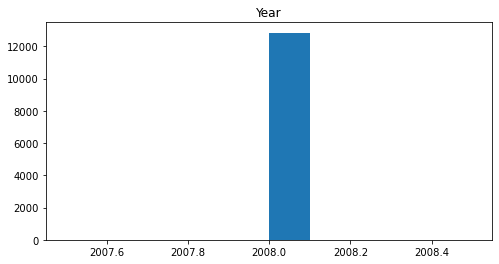

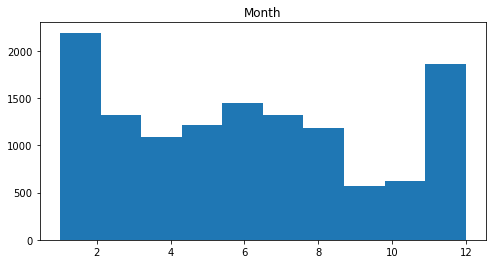

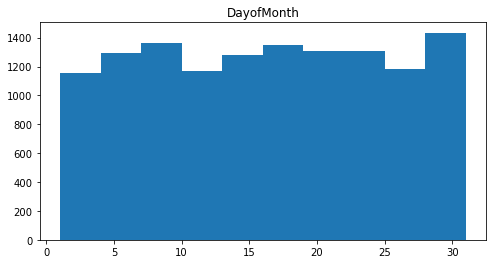

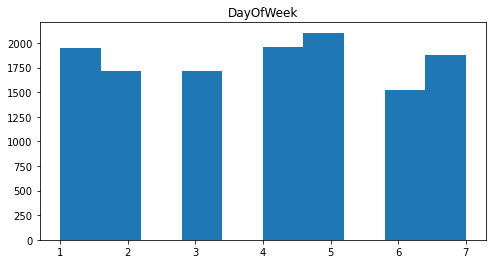

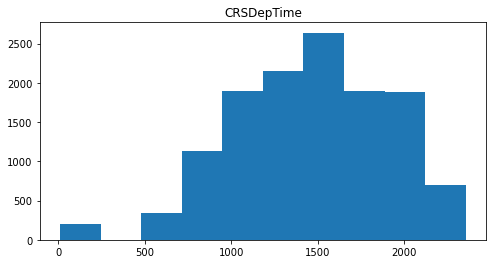

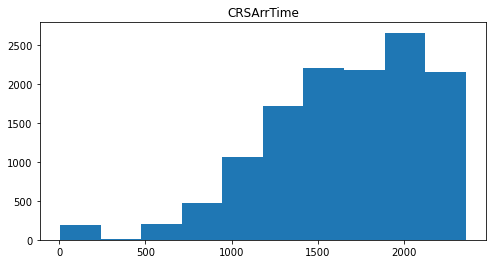

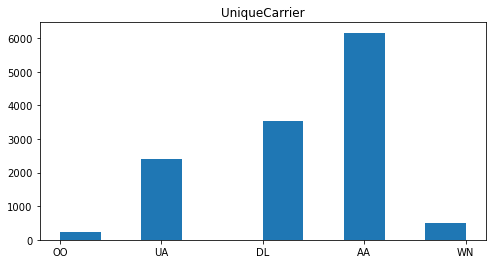

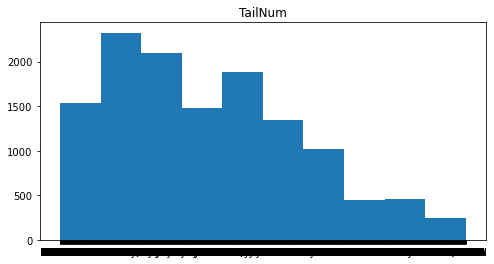

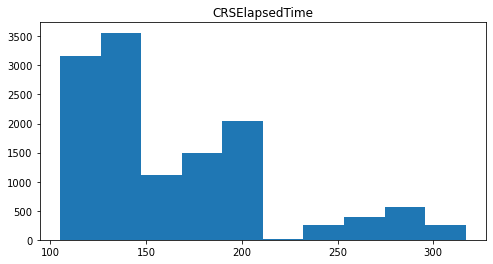

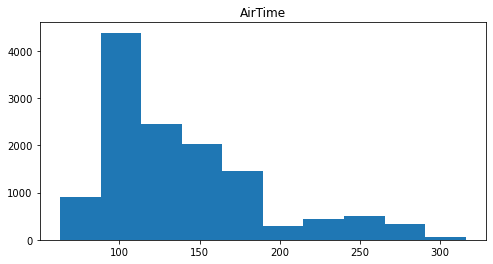

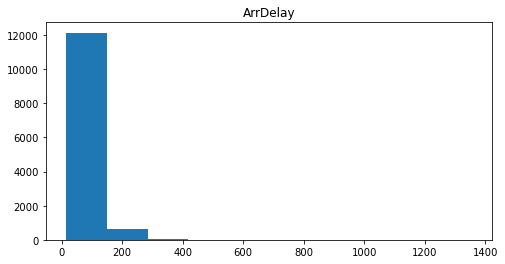

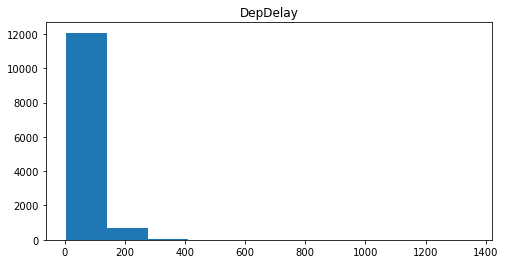

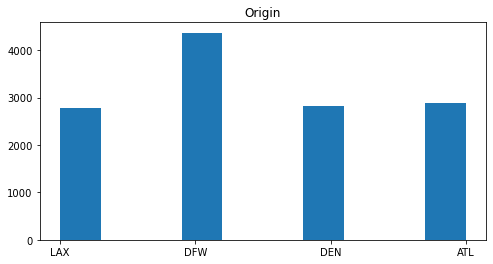

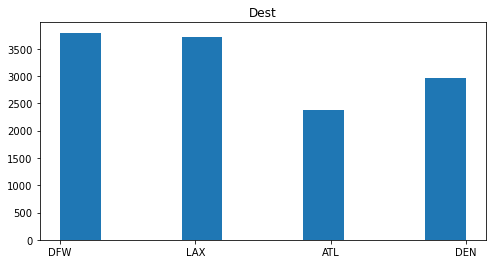

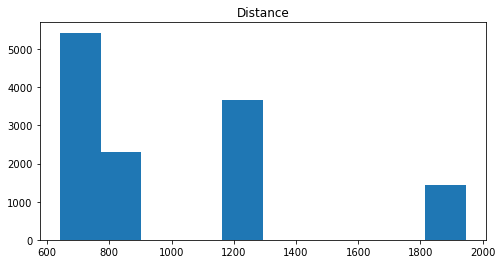

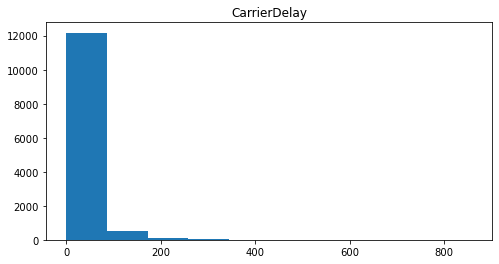

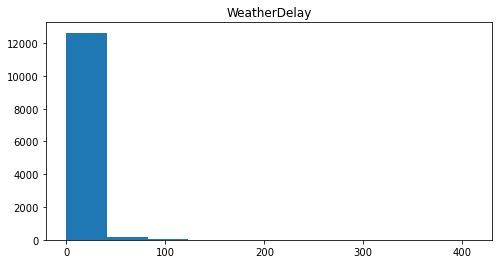

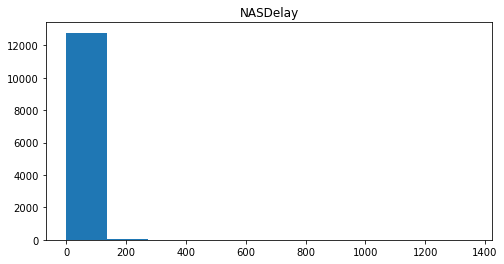

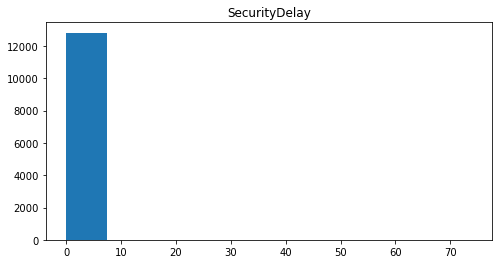

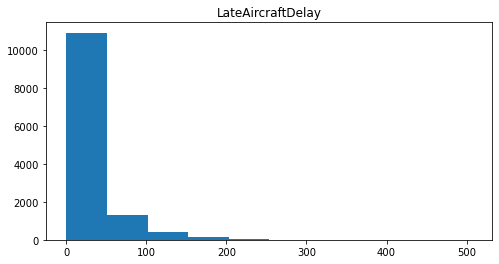

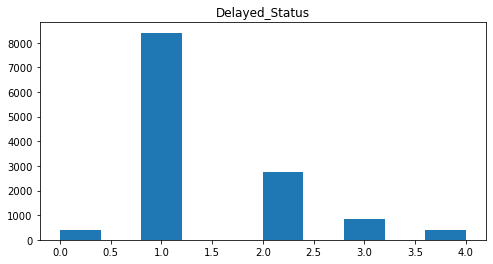

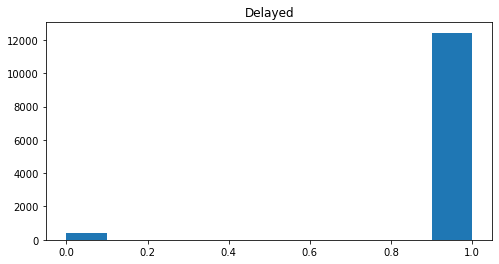

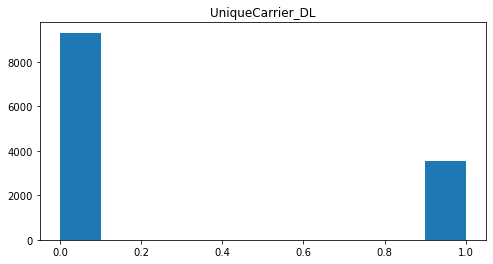

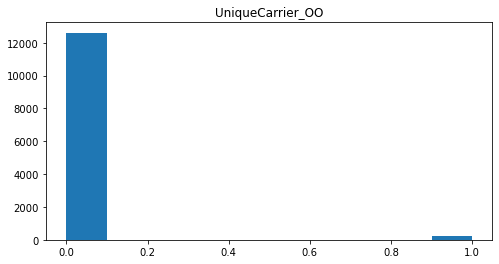

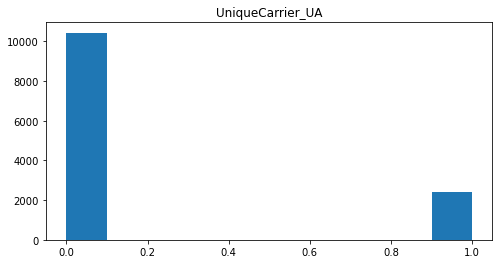

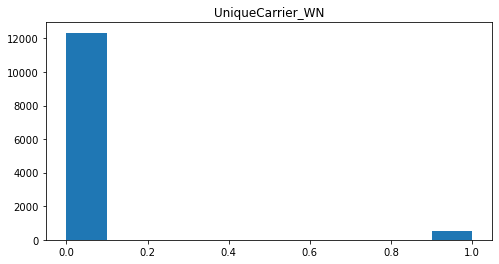

In [12]:
for col in train.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:>

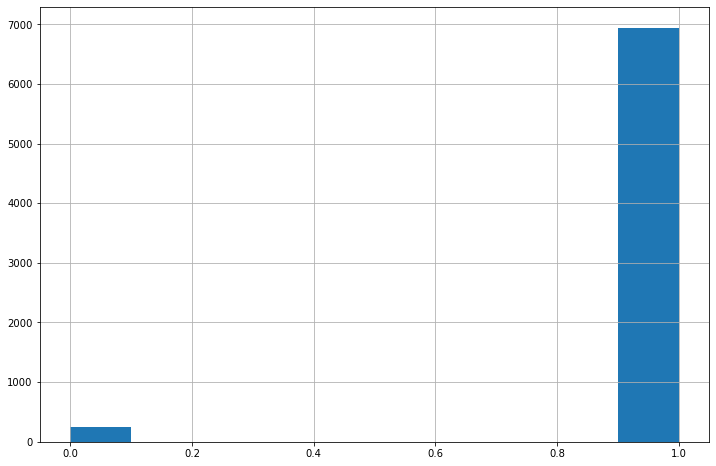

In [13]:
train.Delayed.hist()

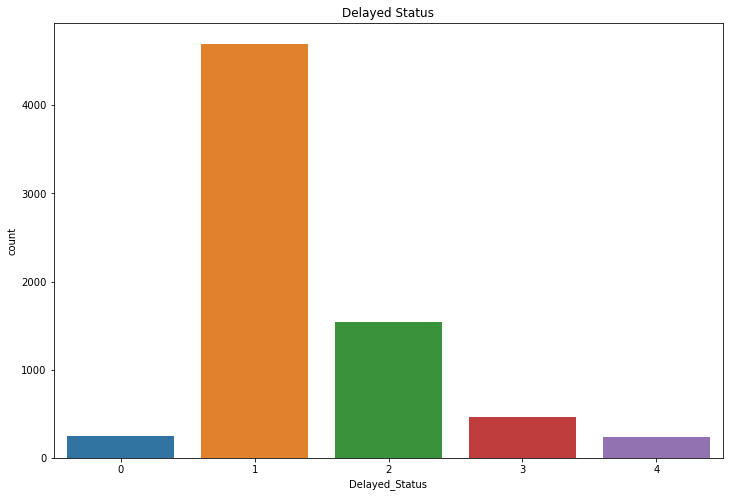

In [14]:
sns.countplot(train.Delayed_Status)
plt.title('Delayed Status')
plt.show()

The majority of delays are greater than 15 minutes but less than 60.

### Airline

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Delayed'>

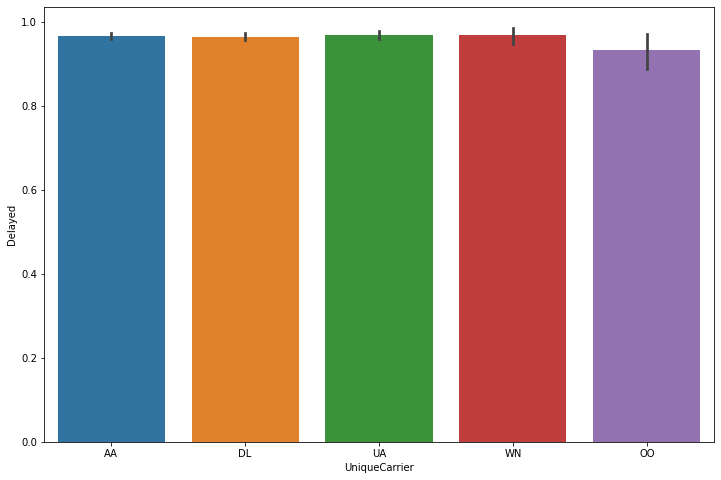

In [15]:
sns.barplot(data=train, x = 'UniqueCarrier', y = 'Delayed')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Delayed_Status'>

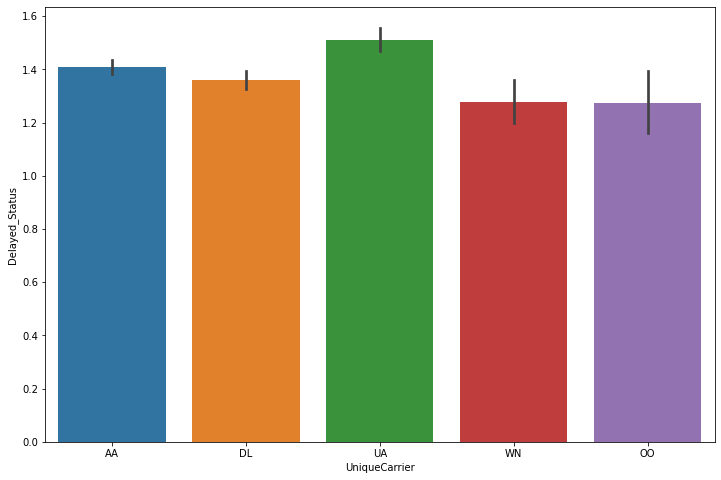

In [16]:
sns.barplot(data=train, x = 'UniqueCarrier', y = 'Delayed_Status')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='count'>

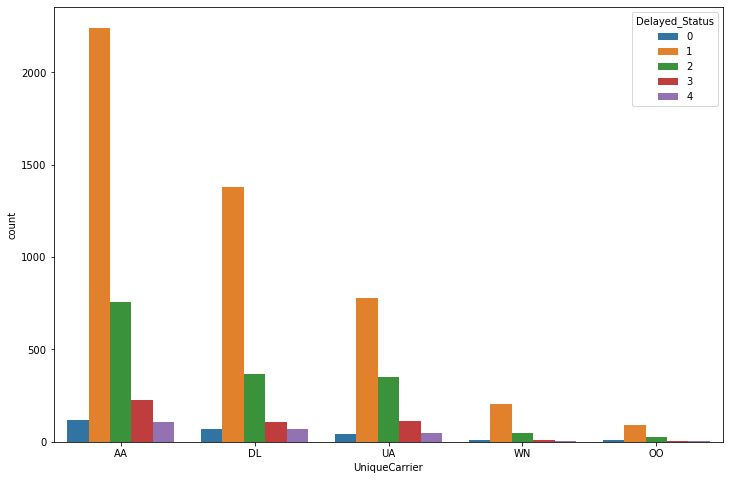

In [17]:
sns.countplot(data=train, x='UniqueCarrier', hue='Delayed_Status')

<AxesSubplot:xlabel='Delayed_Status', ylabel='count'>

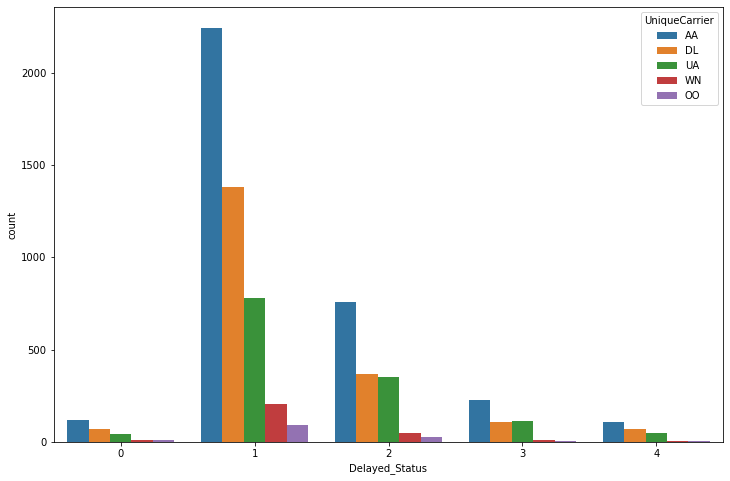

In [18]:
sns.countplot(data=train, x=train.Delayed_Status, hue=train.UniqueCarrier)

<AxesSubplot:xlabel='Delayed_Status', ylabel='ArrDelay'>

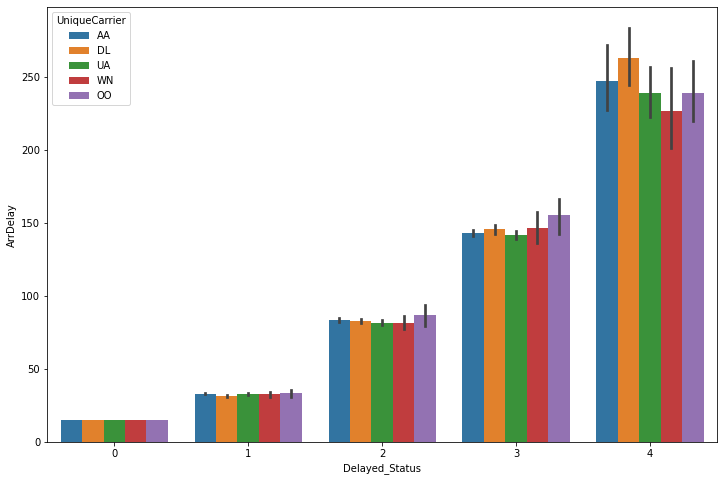

In [19]:
sns.barplot(data=train, y=train.ArrDelay, x=train.Delayed_Status, hue=train.UniqueCarrier)

Notes: Boxplot isn't very helpful. Countplot shows the variability the best between delayed status and airline, however each airline is not equally represented in the data and this could be misleading. 
The barplot with airline as the hue shows similarities in delayed status in group 0-2 but shows some variability between the airlines in groups 3-4 with AA, DL, and UA being most likely to have a delay greater than 5 hours.

In [20]:
AA = train[train.UniqueCarrier =='AA']
DL = train[train.UniqueCarrier =='DL']
UA = train[train.UniqueCarrier =='UA']
OO = train[train.UniqueCarrier =='OO']
WN = train[train.UniqueCarrier =='WN']

Text(0.5, 1.0, 'Southwest Airlines Delayed Status')

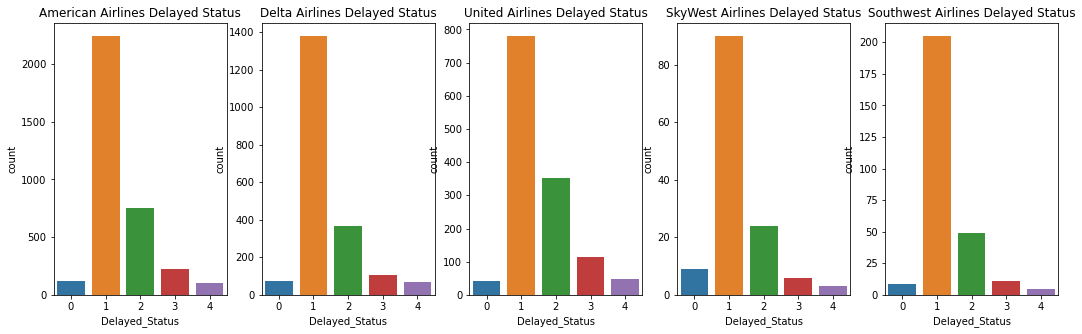

In [21]:
plt.figure(figsize=(18,5))
plt.subplot(151)
sns.countplot(data=AA, x='Delayed_Status')
plt.title('American Airlines Delayed Status')

plt.subplot(152)
sns.countplot(data=DL, x='Delayed_Status')
plt.title('Delta Airlines Delayed Status')

plt.subplot(153)
sns.countplot(data=UA, x='Delayed_Status')
plt.title('United Airlines Delayed Status')

plt.subplot(154)
sns.countplot(data=OO, x='Delayed_Status')
plt.title('SkyWest Airlines Delayed Status')

plt.subplot(155)
sns.countplot(data=WN, x='Delayed_Status')
plt.title('Southwest Airlines Delayed Status')

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and Airline are independent.
- Alternative Hypothesis: Delayed status and Airline are dependent.


In [22]:
observed = pd.crosstab(train.Delayed_Status, train.UniqueCarrier)

In [23]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.7969244654332686e-08

In [24]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


### Airport

<AxesSubplot:xlabel='Delayed_Status', ylabel='ArrDelay'>

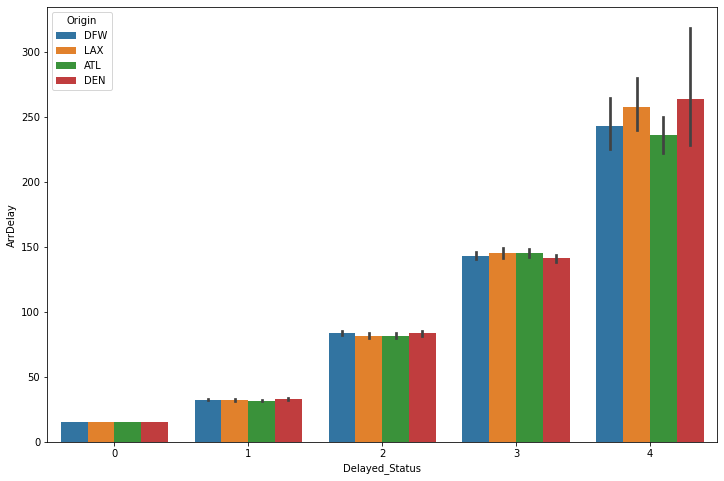

In [25]:
sns.barplot(data=train, x=train.Delayed_Status, y=train.ArrDelay, hue=train.Origin)

In [26]:
DFW = train[train.Origin =='DFW']
LAX = train[train.Origin =='LAX']
ATL = train[train.Origin =='ATL']
DEN = train[train.Origin =='DEN']

Text(0.5, 1.0, 'DEN Departure Delayed Status')

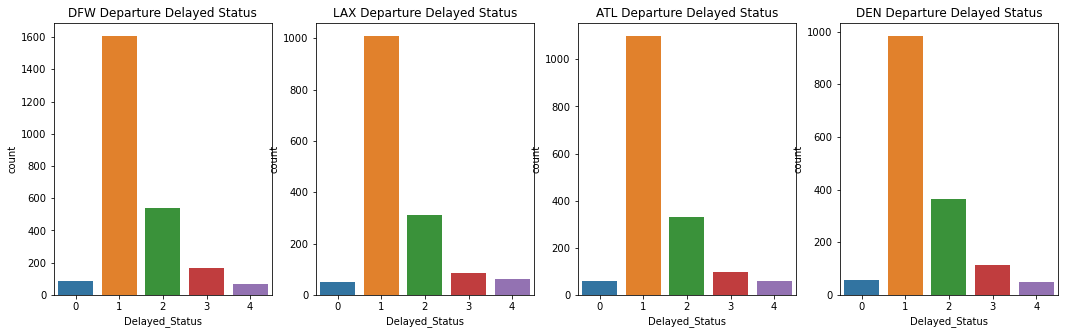

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.countplot(data=DFW, x='Delayed_Status')
plt.title('DFW Departure Delayed Status')

plt.subplot(142)
sns.countplot(data=LAX, x='Delayed_Status')
plt.title('LAX Departure Delayed Status')

plt.subplot(143)
sns.countplot(data=ATL, x='Delayed_Status')
plt.title('ATL Departure Delayed Status')

plt.subplot(144)
sns.countplot(data=DEN, x='Delayed_Status')
plt.title('DEN Departure Delayed Status')


The greatest variability between a flight's takeoff location is in delayed status 4 with Denver being the most likely to have a delay status of greater than 5 hours and Atlanta with the 

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and takeoff location are independent.
- Alternative Hypothesis: Delayed status and takeoff location are dependent.


In [28]:
observed = pd.crosstab(train.Delayed_Status, train.Origin)

In [29]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.10732864876528733

In [30]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Fail to reject the null


### Arival Airport

<AxesSubplot:xlabel='Delayed_Status', ylabel='ArrDelay'>

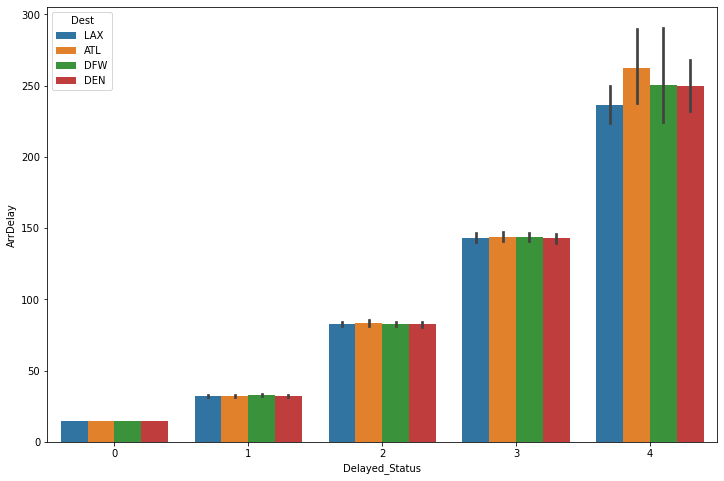

In [31]:
sns.barplot(data=train, x=train.Delayed_Status, y=train.ArrDelay, hue=train.Dest)

In [32]:
DFW_d = train[train.Dest =='DFW']
LAX_d = train[train.Dest =='LAX']
ATL_d = train[train.Dest =='ATL']
DEN_d = train[train.Dest =='DEN']

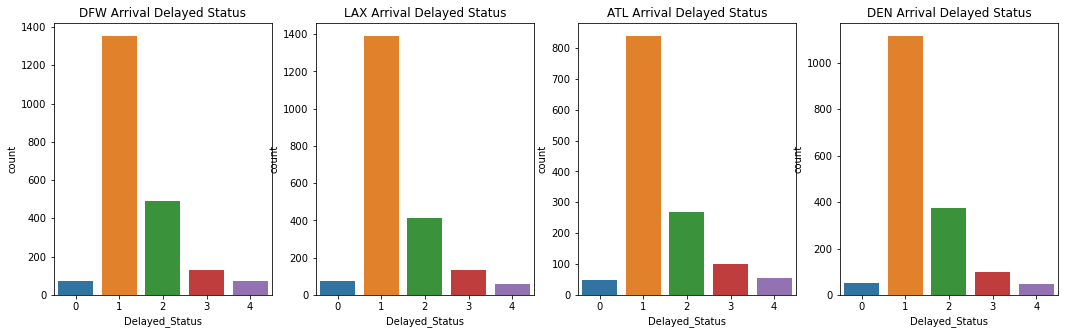

In [33]:
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.countplot(data=DFW_d, x='Delayed_Status')
plt.title('DFW Arrival Delayed Status')

plt.subplot(142)
sns.countplot(data=LAX_d, x='Delayed_Status')
plt.title('LAX Arrival Delayed Status')

plt.subplot(143)
sns.countplot(data=ATL_d, x='Delayed_Status')
plt.title('ATL Arrival Delayed Status')

plt.subplot(144)
sns.countplot(data=DEN_d, x='Delayed_Status')
plt.title('DEN Arrival Delayed Status')
plt.show()

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and arrival location are independent.
- Alternative Hypothesis: Delayed status and arrival location are dependent.

In [34]:
observed = pd.crosstab(train.Delayed_Status, train.Dest)

In [35]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.10829858413351334

In [36]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Fail to reject the null


### Day of the week

<AxesSubplot:xlabel='Delayed_Status', ylabel='count'>

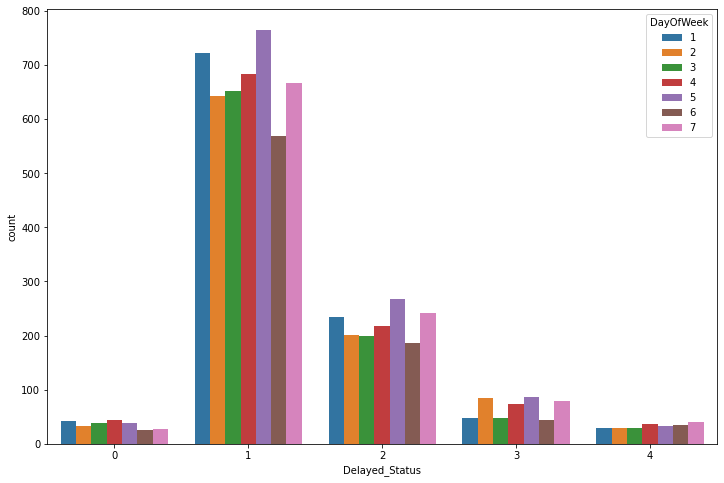

In [37]:
sns.countplot(data=train, hue='DayOfWeek', x='Delayed_Status')

Monday and Friday show the most delays in 15-59 minutes, Friday and Sunday in 60-119 minutes, Tuesday and Friday in 120-179 minutes, and Thursday and Sunday have the highest frequency of delays over 3 hours.

In [38]:
mon=train[train.DayOfWeek==1]
tue=train[train.DayOfWeek==2]
wed=train[train.DayOfWeek==3]
thur=train[train.DayOfWeek==4]
fri=train[train.DayOfWeek==5]
sat=train[train.DayOfWeek==6]
sun=train[train.DayOfWeek==7]

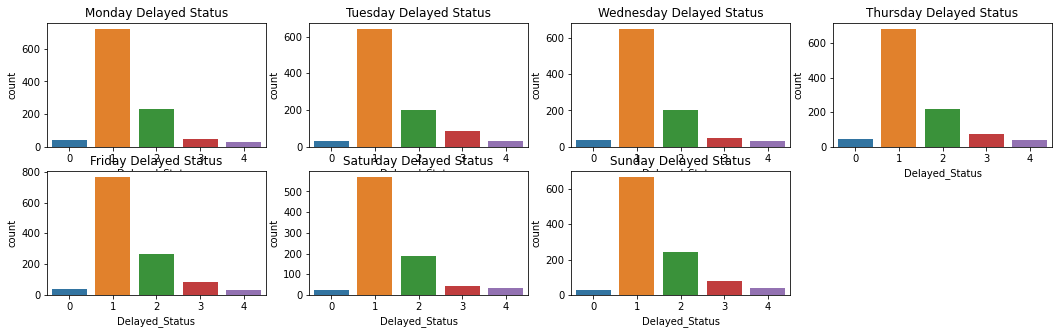

In [39]:
plt.figure(figsize=(18,5))
plt.subplot(241)
sns.countplot(data=mon, x='Delayed_Status')
plt.title('Monday Delayed Status')

plt.subplot(242)
sns.countplot(data=tue, x='Delayed_Status')
plt.title('Tuesday Delayed Status')

plt.subplot(243)
sns.countplot(data=wed, x='Delayed_Status')
plt.title('Wednesday Delayed Status')

plt.subplot(244)
sns.countplot(data=thur, x='Delayed_Status')
plt.title('Thursday Delayed Status')

plt.subplot(245)
sns.countplot(data=fri, x='Delayed_Status')
plt.title('Friday Delayed Status')

plt.subplot(246)
sns.countplot(data=sat, x='Delayed_Status')
plt.title('Saturday Delayed Status')

plt.subplot(247)
sns.countplot(data=sun, x='Delayed_Status')
plt.title('Sunday Delayed Status')
plt.show()



This visualization doesn't show too much variability other than Tuesday's Delay status 3.


**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and day of the week are independent.
- Alternative Hypothesis: Delayed status and day of the week are dependent.

In [40]:
observed = pd.crosstab(train.Delayed_Status, train.DayOfWeek)

In [41]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.02563956820010972

In [42]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


### Month of the year

<AxesSubplot:xlabel='Month', ylabel='Delayed_Status'>

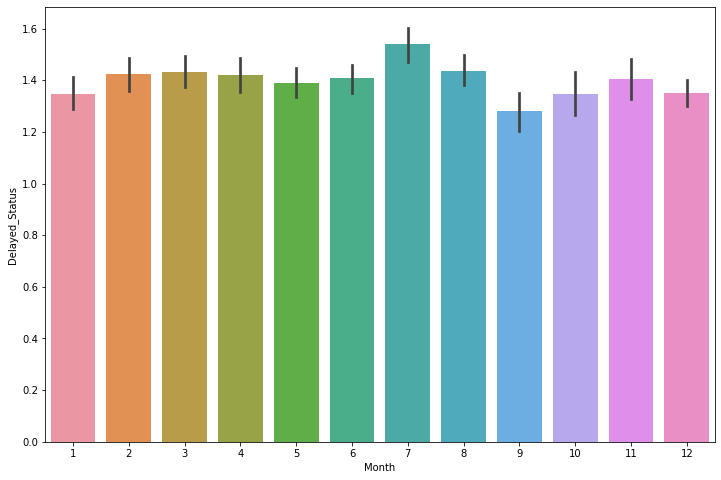

In [43]:
sns.barplot(data=train, x=train.Month, y=train.Delayed_Status)

Visually, variabity betweens months and delayed status is evident.

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and month are independent.
- Alternative Hypothesis: Delayed status and month are dependent.

In [44]:
observed = pd.crosstab(train.Delayed_Status, train.Month)

In [45]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

8.145267866834006e-05

In [46]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


**Answers to questions**
- Does the airline impact flight delays? **Yes, airlines and delayed status are dependent.**
- Does the airport impact flight delays? **No, airport departure and arrival location are independent with delayed status.**
     - Departure and Arrival
- Does the day of the week impact flight delays? **Yes, the day of the week and delayed status are dependent.**
- Does the month impact flight delays? **Yes, delayed status is dependent on the month in which a flight occurs.** 
- Are specific types of delays more likely to occur during a specified time?

### Clustering

In [77]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train,test,validate)

In [102]:
X_train = train_scaled[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_train = train_scaled.Delayed_Status

X_validate = validate_scaled[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_validate = validate_scaled.Delayed_Status

X_test = test_scaled[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_test = test_scaled.Delayed_Status

In [103]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)

kmeans.predict(X_train)
kmeans.predict(X_validate)
kmeans.predict(X_test)

array([3, 2, 2, ..., 0, 3, 0], dtype=int32)

In [104]:
train_scaled['cluster'] = kmeans.predict(X_train)
validate_scaled['cluster'] = kmeans.predict(X_validate)
test_scaled['cluster'] = kmeans.predict(X_test)

Text(0.5, 1.0, 'K-Means Clusters')

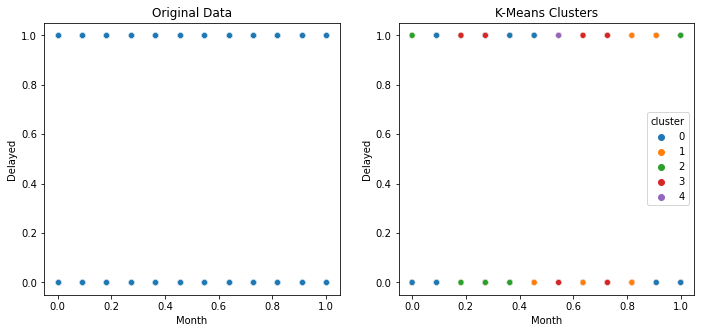

In [141]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.scatterplot(data = train_scaled, x="Month", y="Delayed")
plt.title('Original Data')



plt.subplot(132)
sns.scatterplot(data = train_scaled, x="Month", y="Delayed", hue = 'cluster', palette = ('tab10'))
plt.title('K-Means Clusters')

### Modeling

Baseline Prediction

In [173]:
X_train = train[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_train = train.Delayed_Status

X_validate = validate[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_validate = validate.Delayed_Status

X_test = test[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_test = test.Delayed_Status

In [174]:
train.Delayed_Status.mode()

0    1
dtype: int64

In [175]:
train.Delayed.value_counts()

1    6943
0     250
Name: Delayed, dtype: int64

In [176]:
baseline_prediction = (y_train == 1)

baseline_accuracy = baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.65


### Decision Tree

In [177]:
# create the model
clf = DecisionTreeClassifier(max_depth=7, random_state=123)

In [178]:
# fit the model
clf = clf.fit(X_train, y_train)

In [179]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)

In [180]:
# plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)

In [181]:
y_pred_proba = clf.predict_proba(X_train)

In [182]:
print('Accuracy on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy on training set: 0.66


In [183]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.66      1.00      0.79      4698
           2       0.48      0.02      0.05      1547
           3       0.00      0.00      0.00       464
           4       0.00      0.00      0.00       234

    accuracy                           0.66      7193
   macro avg       0.23      0.20      0.17      7193
weighted avg       0.53      0.66      0.53      7193



In [184]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.65      0.99      0.79      2006
           2       0.28      0.01      0.03       669
           3       0.00      0.00      0.00       219
           4       0.00      0.00      0.00       101

    accuracy                           0.65      3083
   macro avg       0.19      0.20      0.16      3083
weighted avg       0.48      0.65      0.52      3083



### Random Forrests

In [185]:
# create the model
rf = RandomForestClassifier(max_depth=7, 
                            random_state=123)

In [186]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=123)

In [187]:
print(rf.feature_importances_)

[0.33173643 0.48279153 0.05488784 0.02211097 0.0805742  0.02789903]


In [188]:
y_pred = rf.predict(X_train)

In [189]:
y_pred_proba = rf.predict_proba(X_train)

In [190]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.65


KNN

In [191]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance')

In [192]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [193]:
y_pred = knn.predict(X_train)

In [196]:
y_pred_proba = knn.predict_proba(X_train)

In [197]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.66


In [198]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.02      0.04       250
           1       0.66      0.99      0.79      4698
           2       0.49      0.06      0.11      1547
           3       0.75      0.01      0.01       464
           4       0.00      0.00      0.00       234

    accuracy                           0.66      7193
   macro avg       0.52      0.22      0.19      7193
weighted avg       0.61      0.66      0.54      7193



In [199]:
y_pred = knn.predict(X_validate)

In [200]:
y_pred_proba = knn.predict_proba(X_validate)

In [201]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.64


In [202]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.66      0.97      0.78      2006
           2       0.33      0.05      0.09       669
           3       1.00      0.00      0.01       219
           4       0.00      0.00      0.00       101

    accuracy                           0.64      3083
   macro avg       0.40      0.21      0.18      3083
weighted avg       0.57      0.64      0.53      3083



Regression

In [203]:
logit = LogisticRegression(solver='newton-cg')

In [204]:
logit.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [205]:
y_pred = logit.predict(X_train)

In [206]:
y_pred_proba = logit.predict_proba(X_train)

In [207]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.65


In [208]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.65      1.00      0.79      4698
           2       0.00      0.00      0.00      1547
           3       0.00      0.00      0.00       464
           4       0.00      0.00      0.00       234

    accuracy                           0.65      7193
   macro avg       0.13      0.20      0.16      7193
weighted avg       0.43      0.65      0.52      7193

